In [2]:
import pandas as pd

df = pd.read_json("../benchmark/data/real_data.json")

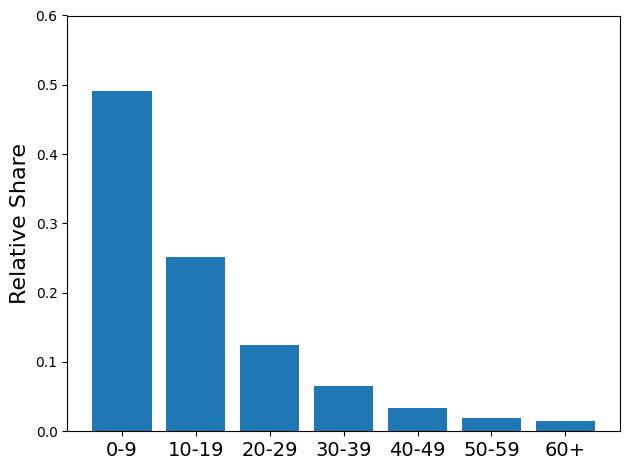

In [8]:
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy as np


def _bin_counts(value_counts):
    bin_size = 10
    max_bin = 60
    binned = defaultdict(int)
    for length, count in value_counts.items():
        if length >= max_bin:
            binned[f"{max_bin}+"] += count
        else:
            bin_start = (length // bin_size) * bin_size
            bin_label = f"{bin_start}-{bin_start + bin_size - 1}"
            binned[bin_label] += count
    return binned


real_lengths = df.groupby("player_id").size().value_counts()
real_binned = _bin_counts(real_lengths)
all_bins = sorted(set(real_binned.keys()), key=lambda x: int(x.split('-')[0]) if '-' in x else 9999)
all_bins = sorted(set(real_binned.keys()), key=lambda x: int(x.split('-')[0]) if '-' in x else 9999)

real_values = np.array([real_binned.get(bin_label) for bin_label in all_bins], dtype=float)
real_rel = real_values / real_values.sum()

x = np.arange(len(all_bins))

fig, ax = plt.subplots()
ax.bar(x, real_rel, label='Sequence Lengths')
ax.tick_params(axis='x', labelsize=14)
# ax.tick_params(axis='y', labelsize=14)
ax.set_xticks(x)
ax.set_xticklabels(all_bins, rotation=0)
ax.set_ylabel('Relative Share', fontsize=16)
# ax.set_xlabel('Sequence Length', fontsize=16)
# ax.set_title('Relative Share of Sequence Lengths', fontsize=20)
ax.set_ylim(0, 0.6)

plt.tight_layout()
plt.savefig("./saved/sequence_length.png")
plt.show()